
# Project: Investigate a Dataset (The No show Appointment Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

### About the columns
<ul>
<li>PatientId : The unique identification number for every patient.
<li>Gender : The sex of each patient
<li>ScheduledDay : Tells us on what day the patient set up their appointment.
<li>AppointmentDay : Tells us on what day the patient set up their appointment.
<li>AppointmentID : The unique identification number for each appointment.
<li>Age: Age of each patient.
<li>Neighbourhood: The location of the hospital.
<li>Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
<li>Hipertension: Indicates whether the patient is hypertensive or not
<li>Diabetes : Indicates whether the patient is diabetic or not
<li>Alcoholism : Indicates whether the patient takes alcohol or not
<li>Handcap : Indicates the number of disabilities have
<li>SMS_received : Indicates whether the patient got an sms reminder for the appointment or not.
<li>No-show : It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.



# Objectives
#### what are the factors that influence the presence of a patient at his or her appointment with the doctor
#### Descibe how different factors affect the decision of a patient to show or not
#### Draw some insights from the dataset

In [1]:
# import statements for all of the packages that i plan to use 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns


C:\Users\Ife\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id='wrangling'></a>
## Data Wrangling

> Note: In this section of the report, i will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [2]:
## Loading the data and printing out a few lines for inspection
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>The columns patient id and appointment ID are unique to each patient and is as good as serial numbers 
and i don't think they would provide significant insights into the data set, therefore they will be dropped




In [3]:
# To check the number of rows and columns in the dataset
df.shape

(110527, 14)

#### The dataframe has 110527 rows and 14 columns

In [4]:
# checking for any duplicated in the dataset
df.duplicated().all()

False

The dataset has no duplicates

In [5]:
# To review the dataset in terms of numbers
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>The age column has a minimum age of -1, this doesn't seem right, so it requires further exploration

>The data looks consistent enough 
The columns with 1 and 0s indicating yes and no has a maximum value of  1 and minimum value of 0 except the handcap column which has to be looked into

In [6]:
# Investigating the age -1 occurence
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


There is only one case of the age -1, this most likely is a case of wrong data input, dropping this row won't affect the analysis negatively , since its a no show theres abundant info to help with the analysis.

In [7]:
# To check the unique values in the Handcap column
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

There seem to be nothing wrong with this column

In [8]:
# Now to check for null values , that is missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<li>There are no null values in the dataset.
This is good 


In [9]:
# To check the data types in the datasets
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

<li>All these datatypes are appropriate except that of ScheduledDay and AppointmentDay
<li> These have to be converted to datetime types

In [10]:
drop_index = df.query('Age == -1').index[0] # get index of row to be dropped
df.drop(drop_index, axis=0, inplace=True)  # drop the row
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<li>The age 0 caught my attention , so i just want to make sure everything checks out the and be sure that its refers to children under the age 1

In [11]:
# Code to check the number of patient with age 0 that showed up
df.query('Age < 1')['No-show'].value_counts()

No     2900
Yes     639
Name: No-show, dtype: int64

> Note : It can be deduced that children under the age of 1 makes a significant subset of this data and they are not just filler cells as we can see that alot of them showed up for their appointment

In [12]:
# Just to confirm all the changes 
df.shape # get the shape of the dataframe

(110526, 14)

In [13]:
# Drop the columns PatientId and AppointmntID
df.drop(columns=['PatientId', 'AppointmentID'], inplace=True)
df.head(2) #view the changes

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


### Data Cleaning 
#### To Do
<li> Clean the headers, by removing all unnecessary white spaces and changing tto lowercase to ease analysis process
<li> Change data types of ScheduledDay and AppointmentDay
<li> Carry out any further cleaning as deemed fit 

In [14]:
# To remove all white spaces in the column names
df0 = df.rename(lambda x: x.strip().lower(), axis='columns')
df0.head(1) # View changes

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Proceeding to change the columns scheduledday, appointmentday and no-show to scheduled_day, appointment_day and no_show respectively

In [15]:
# Code to rename columns
df1 = df0.rename(columns={'scheduledday' : 'scheduled_day', 'appointmentday':'appointment_day', 'no-show':'no_show'})
df1.head(1) # code to view changes

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### Turning my attention to the values in the scheduled_day and appointment_day columns

In [16]:
df1['appointment_day'].describe() #code to describe the data in appointment_day 

count                   110526
unique                      27
top       2016-06-06T00:00:00Z
freq                      4691
Name: appointment_day, dtype: object

In [17]:
df1['scheduled_day'].describe()

count                   110526
unique                  103548
top       2016-05-06T07:09:54Z
freq                        24
Name: scheduled_day, dtype: object

They have to be converted to datetime before anything can be done 

In [18]:
df2 = df1.copy() # code to make a copy of the df1 dataframe before making changes 
df2['scheduled_day'] = pd.to_datetime(df2['scheduled_day']) # code to convert scheduled_day to datetime object
df2['appointment_day'] = pd.to_datetime(df2['appointment_day']) # code to convert appointment_day to datetime object
df2['scheduled_day'].dtype, df2['appointment_day'].dtype # code to confirm changes

(datetime64[ns, UTC], datetime64[ns, UTC])

Making a copy of df1, to enable access to the previous version of the dataframe before changes were made

In [19]:
df2.head(5) # to view changes

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Observation : It looks like scheduled_day and appointment_day are the same only that the scheduled_day contains the time of scheduling also.

Code to confirm my observation

In [20]:
# Comparing the dates in the scheduled_day and appointment_day, removing the time 
is_same_day = df1['scheduled_day'].apply(lambda x: x[:-10]) == df1['appointment_day'].apply(lambda x: x[:-10])
is_same_day.value_counts()

False    71964
True     38562
dtype: int64

It can be seen that  my observation was wrong not all scheduled day and appointment day are the same
> So it's safe to say some patients had their appointment on the same day they scheduled it

<a id='eda'></a>
## Exploratory Data Analysis

> It's time to dive into the dataset for insights



### Research Question 1 
#### How does same day scheduled day and appointment day affect the patient showing up or not

In [21]:
# first to make a copy of df1 to wotk with
df_clean = df1.copy()

I will start by grouping my data into people who have same day scheduled and appointment day and people who don't

In [22]:
# code to compare the dates in scheduled_day and appointed day and create a dataframe for them
same_day = df_clean[df_clean['scheduled_day'].apply(lambda x: x[:-10])==df_clean['appointment_day'].apply(lambda x: x[:-10])]
same_day.head() # check to see if it runs correctly               

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [23]:
# code to compare the dates in scheduled_day and appointed day and create a dataframe for them
not_same_day = df_clean[df_clean['scheduled_day'].apply(lambda x: x[:-10])!=df_clean['appointment_day'].apply(lambda x: x[:-10])]
not_same_day.head()  # check to see if it runs correctly   

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No
10,F,2016-04-27T14:58:11Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,No


Now to group the two dataframes into those that showed up and those that did not 

In [24]:
# code to group the data  into yes for those that did not show up and no for those that did 
same_day = same_day.groupby('no_show') 
not_same_day = not_same_day.groupby('no_show')

In [25]:
same_day['no_show'].count() # code for number of no show patient for same day appointment

no_show
No     36770
Yes     1792
Name: no_show, dtype: int64

In [26]:
not_same_day['no_show'].count() # code for number of no show patient for different day appointmen

no_show
No     51437
Yes    20527
Name: no_show, dtype: int64

#### Plot of patient who had same day appointment that showed or not 

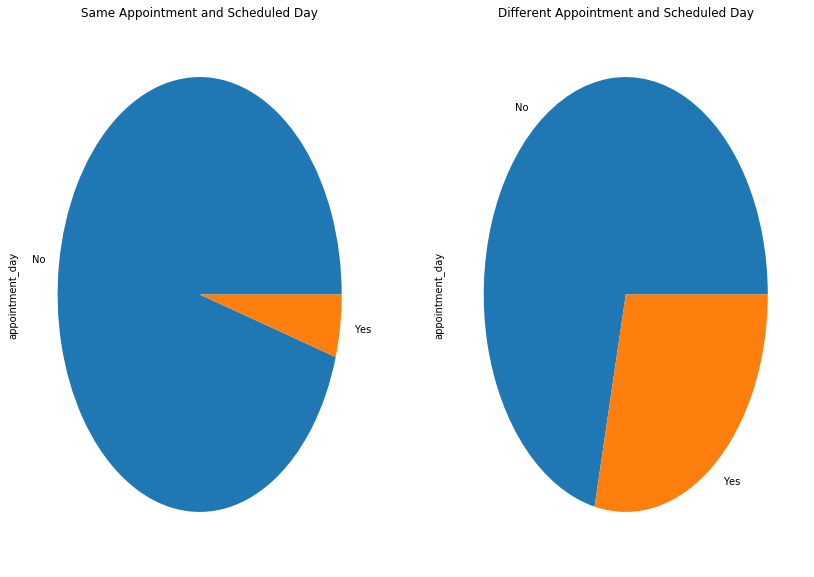

In [27]:
plt.subplot(1,2,1)
same_day.count()['appointment_day'].plot(kind='pie', figsize=(14,10));
plt.title('Same Appointment and Scheduled Day')
plt.subplot(1,2,2)
not_same_day.count()['appointment_day'].plot(kind='pie', figsize=(14,10));
plt.title('Different Appointment and Scheduled Day')
plt.show()

>It is obvious to see that patients with same day appointments showed up more compared to patient with different appointment  day amd scheduled day

### The distribution of the values in the dataset

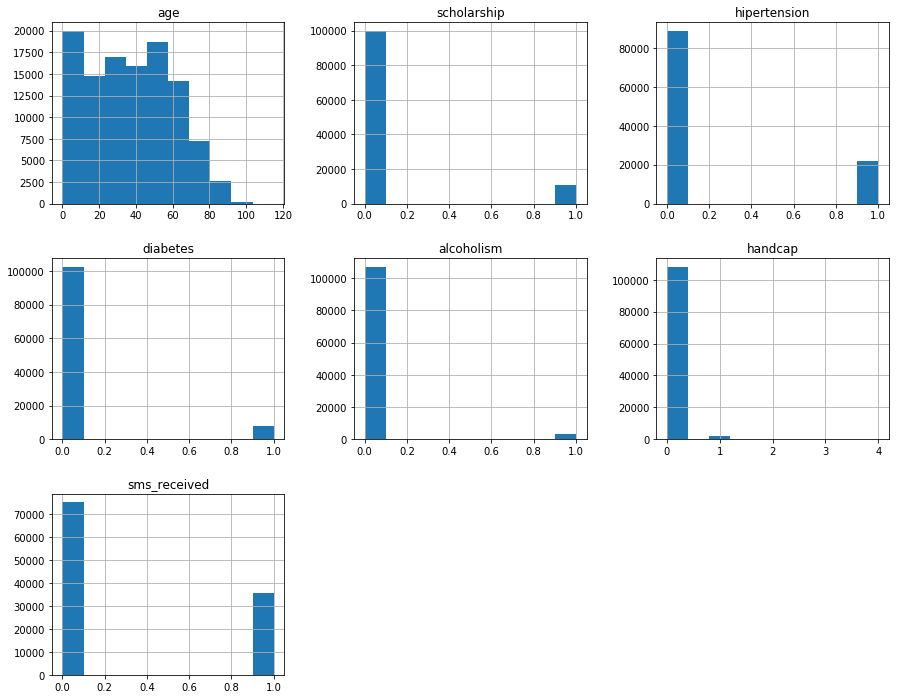

In [28]:
df_clean.hist(figsize=(15,12));

>I will take on the age and sms_received column because of the significant disparity in the data

### Research Question 2  
#### How does sms reminder affect the appearance of the patient at appointments ?

In [29]:
# code to get the number of patients that received sms and those that didn't
df_clean['sms_received'].value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

The amount of patient that got sms , One stands for Yes and Zero stands for No

In [30]:
got_sms = df_clean.query('sms_received == 1') # patients that received sms reminder
no_sms = df_clean.query('sms_received == 0') # patients that didn't receive sms reminder

let's take a look at them

In [31]:
got_sms.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
11,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
15,F,2016-04-26T08:47:27Z,2016-04-29T00:00:00Z,15,NOVA PALESTINA,0,0,0,0,0,1,No
18,F,2016-04-26T10:54:18Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,1,0,0,0,0,1,No
22,M,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,13,CONQUISTA,0,0,0,0,0,1,Yes
25,M,2016-04-26T15:04:17Z,2016-04-29T00:00:00Z,46,CONQUISTA,0,1,0,0,0,1,No


In [32]:
no_sms.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


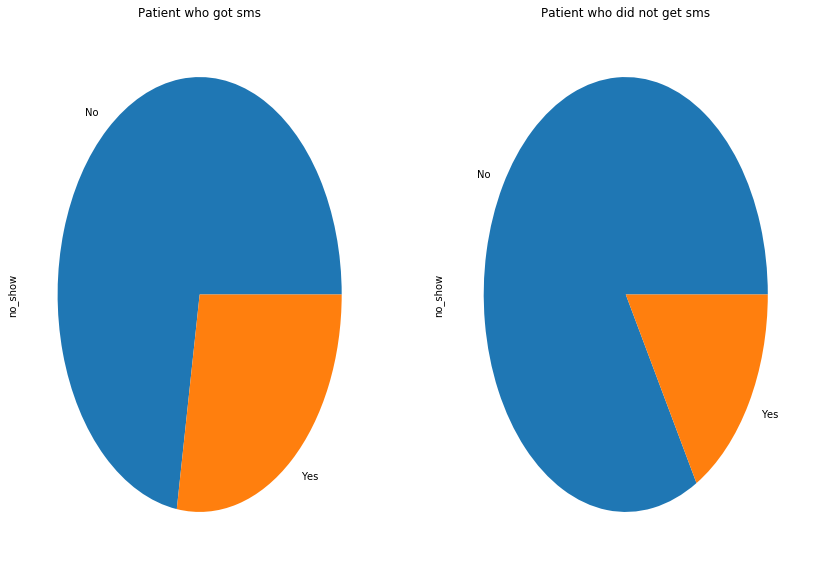

In [33]:
plt.subplot(1,2,1)
got_sms['no_show'].value_counts().plot(kind='pie', figsize=(14,10));
plt.title('Patient who got sms')
plt.subplot(1,2,2)
no_sms['no_show'].value_counts().plot(kind='pie', figsize=(14,10));
plt.title('Patient who did not get sms')
plt.show() # code to visualize the data

The graphs above say that less portion of patient that received sms showed up for their appointment than those that did not

### Research Question 3
#### Does Age have anything to do with patient appearance at appointment?

In [34]:
df_clean1 = df_clean.copy() # Creating a copy of df_clean to work on

To view the characteristics of the age column

In [35]:
df_clean1.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<li>Here you can see the mean age, which is 37.08
<li>The minimum age is 0
<li>The maximum age is 115
<li>The first quarter (25th percentile) is 18
<li>The 75th percentile is 55
      

> Creating age groups using this information for the sake of analysis

<li> 0-18 = child,
    18-37 = Adolescent,
    37-55 = Middle Age,
    55-115 = Old.

In [36]:
age_range = [-1,18,37,55,115]
age_range_name = ['child', 'adolescent', 'middle_age' , 'old']

In [37]:
# code to create the age range column 
df_clean1['age_range']= pd.cut(df_clean1['age'], bins=age_range, labels=age_range_name)
df_clean1.head() # code to review changes

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_range
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,old
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,old
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,old
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,child
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,old


In [38]:
age_show=df_clean1.query('no_show=="No"') # creating a datafreme of all No values in the no_show column 
age_no_show = df_clean1.query('no_show=="Yes"') #creating a datafreme of all Yes values in the no_show column

In [39]:
# Grouping the data by age range
s = age_show.groupby('age_range')
ns = age_no_show.groupby('age_range')

In [40]:
#Count of each age range
s_age = s.count()['age']
ns_age = ns.count()['age']
s_age # view the count for patient that showed up by age range

age_range
child         22519
adolescent    20836
middle_age    21651
old           23201
Name: age, dtype: int64

Plotting these values side by side in a bar chart for comparison

In [41]:
# Getting all the values in s_age and ns_age into lists for plotting
ns_bar = []
s_bar = []
for i in range(len(s_age)):
    s_bar.append(s_age[i])
for i in range(len(ns_age)):
    ns_bar.append(ns_age[i])
        
ns_bar, s_bar

([6347, 6414, 5255, 4303], [22519, 20836, 21651, 23201])

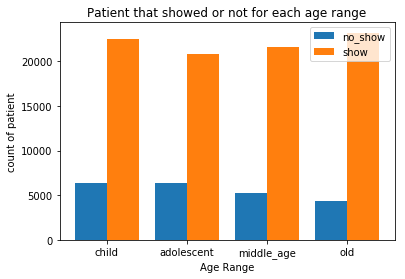

In [42]:

x_axis = np.arange(len(s_age)) # creating the bar locations on the x axis
plt.bar(x_axis-0.2, ns_bar, width=0.4, label='no_show'); # plot no show bar chart
plt.bar(x_axis+0.2, s_bar, width=0.4, label='show'); # plot the show bar chart
#Xticks 
plt.xticks(x_axis, ['child', 'adolescent', 'middle_age', 'old'])
# Add x-label
plt.xlabel('Age Range')
# Add y-label
plt.ylabel('count of patient')
# Add title
plt.title('Patient that showed or not for each age range')
#Add legend
plt.legend()
plt.show() # Show the plot

Old patient missed less of their appointment in this data set and Adolescent age group missed the most when you compare to the number of those that showed up

> This would be better illustrated by plotting a graph of the no show proportions for each age range ,that is using the fraction of no show patients by total patients in each age_range

In [43]:
#code to group the data by age range and get the count for each age range
tot_age_range = df_clean1.groupby('age_range').count()['no_show']
# view the values
tot_age_range

age_range
child         28866
adolescent    27250
middle_age    26906
old           27504
Name: no_show, dtype: int64

We have to extract the values fromthe series above and convert to arrays

In [44]:
# the code to do just that
total_age_range = []
for i in range(len(tot_age_range)):
    total_age_range.append(tot_age_range[i])
total_age_range=np.array(total_age_range)
total_age_range # Display the new array

array([28866, 27250, 26906, 27504], dtype=int64)

In [45]:
ns_bar_array =np.array(ns_bar) # convert the list of no show count to an np array
prop_age_range = ns_bar/total_age_range # computing the proportions
prop_age_range # print the cout values

array([0.21987806, 0.23537615, 0.1953096 , 0.15644997])

Conversion to np arrays is necessary in oder to facilitate their division and get the required proportions

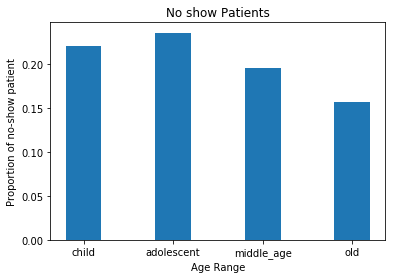

In [46]:
# Code to plot the proportions
plt.bar(x_axis, prop_age_range, width=0.4);
#Xticks 
plt.xticks(x_axis, ['child', 'adolescent', 'middle_age', 'old'])
# Add x-axis label
plt.xlabel('Age Range')
# Add y-axis label
plt.ylabel('Proportion of no-show patient')
# Add title
plt.title('No show Patients')
plt.show() # Show the plot

> It is now very clear to see now that the adoescent age range have the highest number of no show patients

<a id='conclusions'></a>
## Conclusions

> <li> There's a convincing indication that patient who have same day appointment day and scheduled day tend to show up for their appointment more, probably due to the fact that they are already at the mdeical institution.
    
> <li> I initially felt that patients who received sms reminders about their appointment would show up more but the data says otherwise , there might be other some underlying factors but this is what my analysis says , that people with no sms received showed up more.
    
><li> From the analysis it can be seen that patients in the adolescent age range missed more of their appointments than other age range , this might be due to their very unstable and busy lifestyle unlike patients in the old age range who are probably retired and have little to do.
    
><li> Limitations : There was no hindrance to my analysis, the data provided is clean enough and very well stored, no missing data, except for the one case of age -1,  which isn't so significant.
